In [1]:
using DataFrames, GraphPlot, Impute, Plots, Colors

dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
k = 5
m = k^2
SquareNet, position_array, dist_matrix = SquareDiGraph(k, doble_sentido = true);

In [3]:
#origin_sq = rand(1:m)
#destination_sq = rand(1:m)

origin_sq = 21
destination_sq = 15
println("$origin_sq - $destination_sq")

21 - 15


## Heurística de tiempo euclideano

### City Matrix
Es un arreglo 3 dimensional que contiene:

- El tiempo mínimo que se requiere para recorrer cada arista (siguiendo la regla de velocidad máxima de la ciudad.

In [4]:
city_matrix = zeros(m,m,4);

In [5]:
f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]

#120 (generic function with 1 method)

In [6]:
city_matrix[:,:,1] = dist_matrix./f(position_array);

- La capacidad de cada arista, que se calcula como: $\frac{lc}{5}$, donde $l$ es la longitud de la calle en metros y $c$ el número de carriles.

In [7]:
city_matrix[:,:,2] = dist_matrix.*3/5;

- El número de autos que hay en cada arista. Antes de empezar la simulación es 0 en todas las aristas, y 
- El valor según la función BPR para cada arista

In [8]:
city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);

### Función de avance de los autos
- Los automóviles siguen las rutas establecidas por el algoritmo A\*.
- En cada tiempo se mantiene la información de cuántos autos hay en cada arista en la forma de una matriz de adyacencia y se calcula la función BPR para establecer la velocidad real en cada una de ellas.
- Los autos avanzan a través de sus rutas planeadas pero a la velocidad establecida por la función BPR.
- Los autos guardan información de la velocidad real que tuvieron en cada arista y usarán esa información en una heurística de memoria la próxima vez que calculen su ruta.

In [9]:
red_cuadrada=network(SquareNet,position_array,city_matrix);

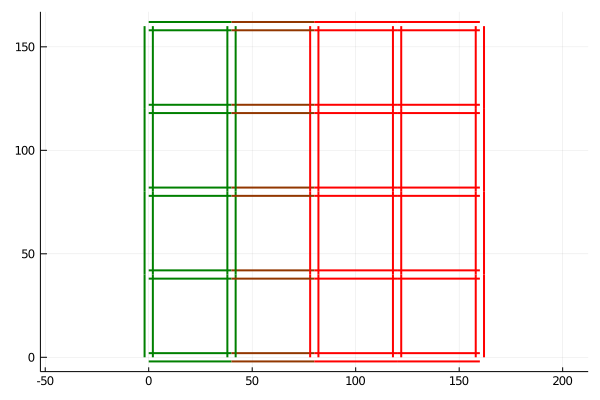

In [10]:
plot_digraph(SquareNet, position_array, attribute_matrix=dist_matrix./city_matrix[:,:,4], separated_edges=true)

#### Objeto automovil
- Tiene que tener memoria de los últimos viajes, cuánto tarda en realidad en ir de i a j.
- Tiene que calcular A* al inicio de cada viaje
- Debe tener información sobre su origen y su destino

In [11]:
auto1 = auto(origin_sq,destination_sq,0.25,.25,red_cuadrada);
auto2 = auto(origin_sq,destination_sq,1.00,1.,red_cuadrada);
auto3 = auto(7,19,7.30,.25,red_cuadrada);
auto4 = auto(18,1,8.35,.25,red_cuadrada);
auto5 = auto(20,8,10.5,.25,red_cuadrada);

una vez que el auto ha completado su trayectoria, debe actualizar su camino calculado, pesado por qué tanta importancia le da el automovilista a sus recuerdos.

Conforme el auto va avanzando debe ir guardando los tiempos reales entre los nodos, esto se hará utilizando un diccionario.

### Simulación de los autos
- En cada tiempo se busca cuál es el siguiente evento:
    - Un auto cambia de arista
    - Un auto sale de su origen
    - Un auto llega a su destino
- Se recorrerá el tiempo y cada auto (para el que aplique la condición) avanzará sobre la arista donde va avanzando.
- Cada vez que un auto cambie de arista cambiará la velocidad reportada para el nodo al que llegó
- Una vez que acabe la simulación, los autos actualizan su camino A* usando la heurística de memoria.


In [12]:
autos = [auto1, auto2, auto3, auto4, auto5];

In [13]:
times, vels = simulacion!(0.,red_cuadrada, autos);

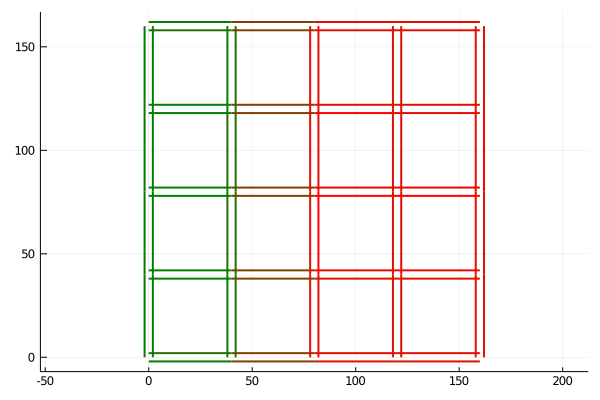

In [14]:
plot_digraph(SquareNet, position_array, attribute_matrix=vels,separated_edges=true)

In [15]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

In [16]:
c1 = colorant"red"
c2 = colorant"blue"
carcolors = range(c1, stop=c2, length=5)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaynodiag.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaynodiag.gif")
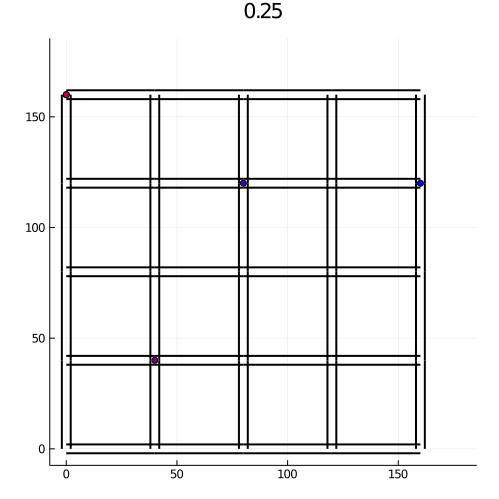

In [17]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors, aspect_ratio =1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false, 
        mcolor = RGB(0,1,0), aspect_ratio =1, size=(500,500))
end
gif(anim, "../gifs/firstdaynodiag.gif", fps = 50)

In [18]:
restart(autos, red_cuadrada)
times, vels = simulacion!(0.,red_cuadrada, autos);

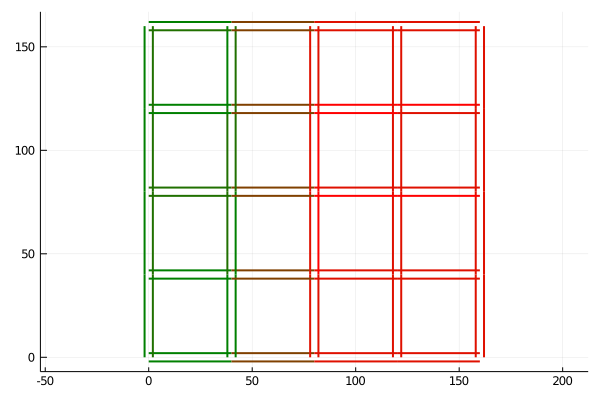

In [19]:
plot_digraph(SquareNet, position_array, attribute_matrix=vels,separated_edges=true)

In [20]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

In [21]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end

Animation("/var/folders/37/27tymzts0j39vyg7szt9r2940000gn/T/jl_c3QrN4", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000344.png", "000345.png", "000346.png", "000347.png", "000348.png", "000349.png", "000350.png", "000351.png", "000352.png", "000353.png"])

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/seconddaynodiag.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/seconddaynodiag.gif")
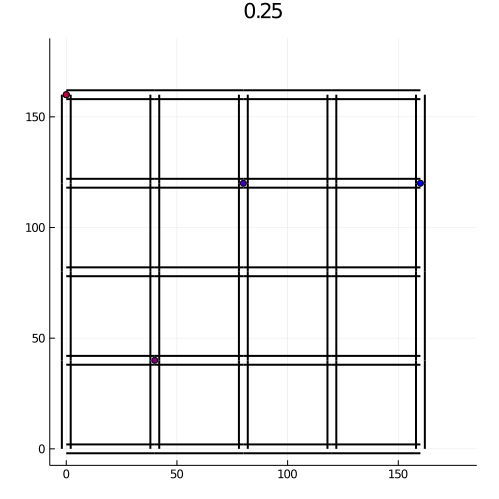

In [22]:
gif(anim, "../gifs/seconddaynodiag.gif", fps = 50)

In [23]:
restart(autos, red_cuadrada)
print(autos)

auto[

auto(21, 15, 

0.25, 0.25, 

[Dict(13 => 7.999999999974159,14 => 7.999999999974159,17

 => 14.999999999999954,21 => 14.999999999999954,22 => 14.999999999999954,12 => 11.499999999962855), Dict(13 => 7.999999999974159,14 => 7.999999999974159,17 => 14.99999999995155,21 => 14.99999999995155,22 => 14.99999999995155,12 => 11.499999999962855), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}()], Dict{Int64,Float64}(), 

LightGraphs.SimpleGraphs.SimpleEdge{Int64}[Edge 21 => 22, Edge 22 => 17, Edge 17 => 12, Edge 12 => 13, Edge 13 => 14, Edge 14 => 15], 21, 22, 0.0, 0.0, 

[[0.0, 160.0]], false, 0.0), auto(21, 15, 1.0, 1.0, [Dict(13 => 7.999999999999974,14 => 7.999999999999974,16 => 14.999999999999954,11 => 14.999999999999954,21 => 14.999999999999954,12 => 11.499999999999964), Dict(13 => 7.999999999999974,14 => 7.999999999999974,17 => 14.999999999999954,21 => 14.999999999999954,22 => 14.999999999999954,12 => 11.499999999999964), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}()], Dict{Int64,Float64}(), LightGraphs.SimpleGraphs.SimpleEdge{Int64}[Edge 21 => 22, Edge 22 => 17, Edge 17 => 12, Edge 12 => 13, Edge 13 => 14, Edge 14 => 15], 21, 22, 0.0, 0.0, [[0.0, 160.0]], false, 0.0), auto(7, 19, 7.3, 0.25, [Dict(7 => 14.999999999999954,17 => 11.499999999999964,12 => 14.999999999999954,18 => 7.999999999999974), Dict(7 => 14.999999999999954,17 => 11.499999999999964,12 => 14.999999999999954,18 => 7.999999999999974), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Float64}(), Dict{Int64,Flo

Agregar mini calles, las vias rapidas no las tienen, mas que en las orillas, sobre las diagonales no hay callecitas
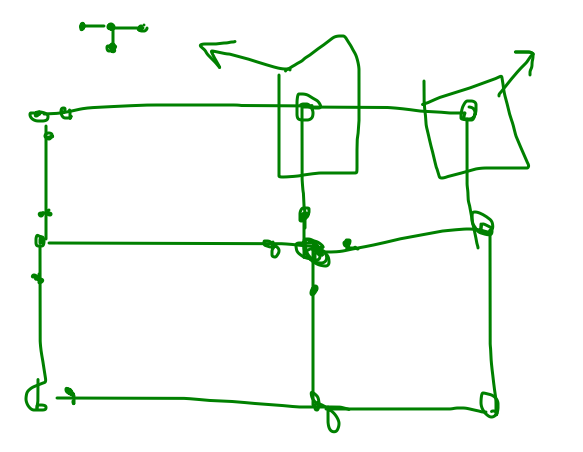

Agregar diagonales
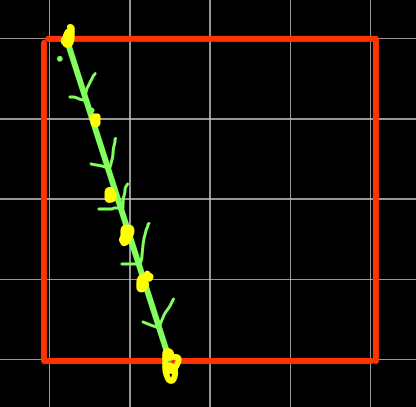

In [48]:
nw,posarr,distm = SquareDiGraph(5, doble_sentido=true)

({25, 80} directed simple Int64 graph, [[0.0, 0.0], [40.0, 0.0], [80.0, 0.0], [120.0, 0.0], [160.0, 0.0], [0.0, 40.0], [40.0, 40.0], [80.0, 40.0], [120.0, 40.0], [160.0, 40.0]  …  [0.0, 120.0], [40.0, 120.0], [80.0, 120.0], [120.0, 120.0], [160.0, 120.0], [0.0, 160.0], [40.0, 160.0], [80.0, 160.0], [120.0, 160.0], [160.0, 160.0]], [0.0 40.0 … 200.0 226.27416997969522; 40.0 0.0 … 178.88543819998318 200.0; … ; 200.0 178.88543819998318 … 0.0 40.0; 226.27416997969522 200.0 … 40.0 0.0])

In [49]:
diag_start = [7.,160.]
pendiente = -pi/5

-0.6283185307179586

In [50]:
nw, posarr, distm, new_positions = add_diagonal!(nw,posarr,diag_start, pendiente, 5.,40.)

({32, 100} directed simple Int64 graph, [[0.0, 0.0], [40.0, 0.0], [80.0, 0.0], [120.0, 0.0], [160.0, 0.0], [0.0, 40.0], [40.0, 40.0], [80.0, 40.0], [120.0, 40.0], [160.0, 40.0]  …  [80.0, 160.0], [120.0, 160.0], [160.0, 160.0], [7.0, 160.0], [40.0, 139.26549], [70.66198, 120.0], [80.0, 114.13275], [120.0, 89.00001], [134.32395, 80.0], [160.0, 63.86726]], [0.0 40.0 … 156.34232806122114 172.27601951492727; 40.0 0.0 … 123.68107188896165 135.93758457434646; … ; 156.34232806122114 123.68107188896165 … 0.0 30.32366804181348; 172.27601951492727 135.93758457434646 … 30.32366804181348 0.0], Any[[7.0, 160.0], [40.0, 139.26549], [70.66198, 120.0], [80.0, 114.13275], [120.0, 89.00001], [134.32395, 80.0], [160.0, 63.86726]])

In [51]:
SquareNet, position_array, dist_matrix = make_slow_corners(nw,posarr,new_positions);

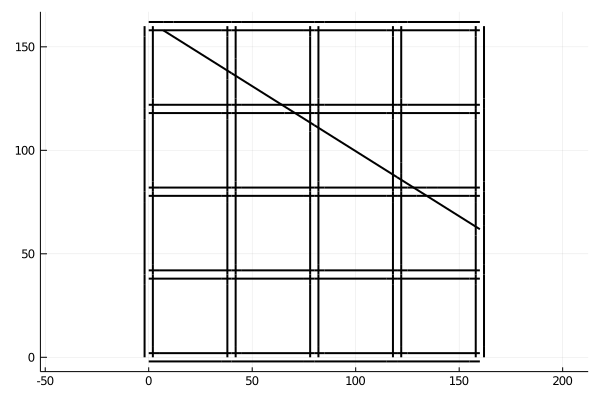

In [52]:
plot_digraph(SquareNet, position_array, separated_edges=true)

In [53]:
k = nv(nw)

118

In [54]:
city_matrix = zeros(k, k,4);

In [55]:
f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]

#120 (generic function with 1 method)

In [56]:
city_matrix[:,:,1] = dist_matrix./f(position_array);

In [57]:
city_matrix[:,:,2] = max.(dist_matrix.*3/5,ones(k,k));

In [58]:
city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);

In [59]:
red_cuadrada=network(SquareNet,position_array,city_matrix);

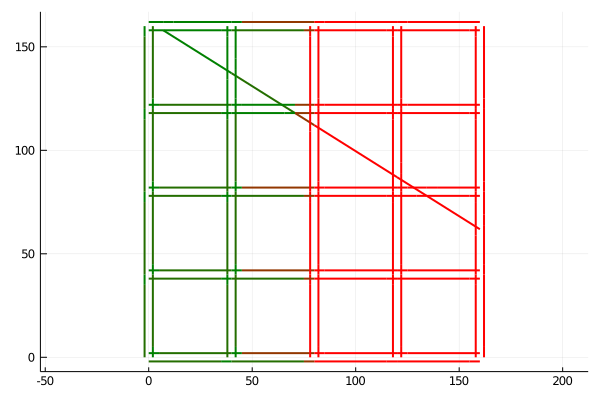

In [60]:
plot_digraph(SquareNet, position_array, attribute_matrix=dist_matrix./city_matrix[:,:,4], separated_edges=true)

In [61]:
path = LightGraphs.a_star(red_cuadrada.digraph,origin_sq,destination_sq,red_cuadrada.city_matrix[:,:,1])

8-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 21 => 26
 Edge 26 => 27
 Edge 27 => 28
 Edge 28 => 29
 Edge 29 => 30
 Edge 30 => 31
 Edge 31 => 116
 Edge 116 => 15

In [62]:
auto1 = auto(origin_sq,destination_sq,0.25,.25,red_cuadrada);
auto2 = auto(origin_sq,destination_sq,1.00,1.,red_cuadrada);
auto3 = auto(7,19,7.30,.25,red_cuadrada);
auto4 = auto(18,1,8.35,.25,red_cuadrada);
auto5 = auto(20,8,10.5,.25,red_cuadrada);

In [63]:
autos = [auto1, auto2, auto3, auto4, auto5];

In [64]:
times, vels = simulacion!(0.,red_cuadrada, autos);

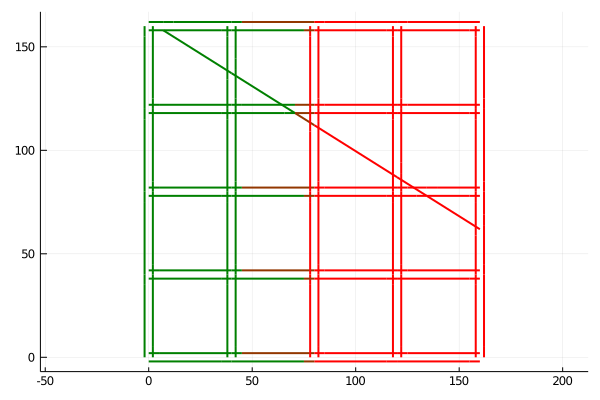

In [65]:
plot_digraph(SquareNet, position_array, attribute_matrix=vels,separated_edges=true)

In [66]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaydiag.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaydiag.gif")
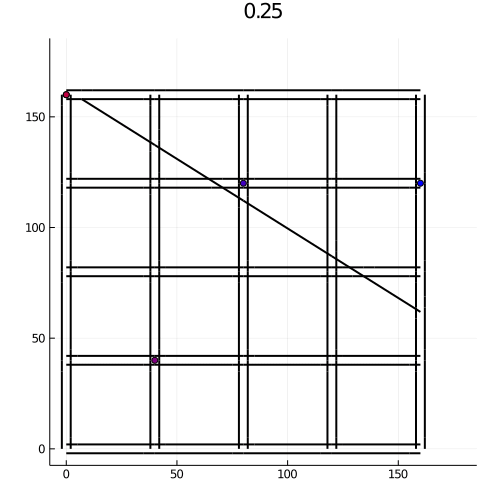

In [67]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end
gif(anim, "gifs/firstdaydiag.gif", fps = 50)

In [68]:
restart(autos, red_cuadrada)
times, vels = simulacion!(0.,red_cuadrada, autos);

a path changed from LightGraphs.SimpleGraphs.SimpleEdge{Int64}[Edge 18 => 28, Edge 28 => 112, Edge 112 => 17, Edge 17 => 84, Edge 84 => 12, Edge 12 => 67, Edge 67 => 7, Edge 7 => 49, Edge 49 => 2, Edge 2 => 35, Edge 35 => 1] to LightGraphs.SimpleGraphs.SimpleEdge{Int64}[Edge 18 => 28, Edge 28 => 112, Edge 112 => 17, Edge 17 => 85, Edge 85 => 16, Edge 16 => 81, Edge 81 => 11, Edge 11 => 64, Edge 64 => 6, Edge 6 => 46, Edge 46 => 1]
a path changed from LightGraphs.SimpleGraphs.SimpleEdge{Int64}[Edge 20 => 95, Edge 95 => 19, Edge 19 => 93, Edge 93 => 30, Edge 30 => 14, Edge 14 => 75, Edge 75 => 9, Edge 9 => 58, Edge 58 => 8] to LightGraphs.SimpleGraphs.SimpleEdge{Int64}[Edge 20 => 94, Edge 94 => 15, Edge 15 => 79, Edge 79 => 31, Edge 31 => 115, Edge 115 => 14, Edge 14 => 76, Edge 76 => 13, Edge 13 => 71, Edge 71 => 8]


In [69]:
new_times, coordenadasx_grafica, coordenadasy_grafica = continuos_time!(times,autos);

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/seconddaydiag.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/seconddaydiag.gif")
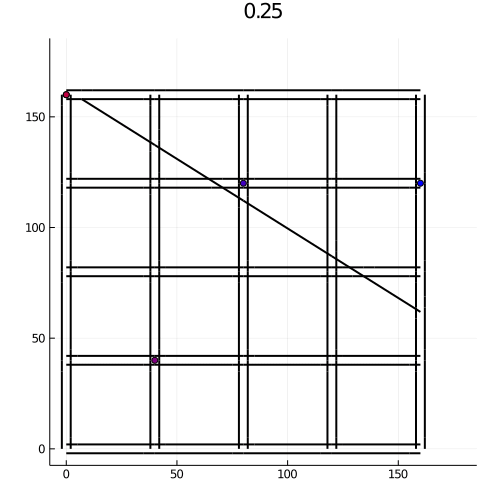

In [70]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end
gif(anim, "gifs/seconddaydiag.gif", fps = 50)

In [71]:
k = 5
m = k^2
SquareNet, position_array, dist_matrix = SquareDiGraph(k);

In [72]:
#origin_sq = rand(1:m)
#destination_sq = rand(1:m)

origin_sq = 21
destination_sq = 15
println("$origin_sq - $destination_sq")

21 - 15


## UN SENTIDO Heurística de tiempo euclideano

In [73]:
k = 5
m = k^2
SquareNet, position_array, dist_matrix = SquareDiGraph(k);

In [74]:
#origin_sq = rand(1:m)
#destination_sq = rand(1:m)

origin_sq = 21
destination_sq = 15
println("$origin_sq - $destination_sq")

21 - 15


### City Matrix
Es un arreglo 3 dimensional que contiene:

- El tiempo mínimo que se requiere para recorrer cada arista (siguiendo la regla de velocidad máxima de la ciudad.

In [75]:
city_matrix = zeros(m,m,4);

In [76]:
f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]

#140 (generic function with 1 method)

In [77]:
city_matrix[:,:,1] = dist_matrix./f(position_array);

- La capacidad de cada arista, que se calcula como: $\frac{lc}{5}$, donde $l$ es la longitud de la calle en metros y $c$ el número de carriles.

In [78]:
city_matrix[:,:,2] = dist_matrix.*3/5;

- El número de autos que hay en cada arista. Antes de empezar la simulación es 0 en todas las aristas, y 
- El valor según la función BPR para cada arista

In [79]:
city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);

### Función de avance de los autos
- Los automóviles siguen las rutas establecidas por el algoritmo A\*.
- En cada tiempo se mantiene la información de cuántos autos hay en cada arista en la forma de una matriz de adyacencia y se calcula la función BPR para establecer la velocidad real en cada una de ellas.
- Los autos avanzan a través de sus rutas planeadas pero a la velocidad establecida por la función BPR.
- Los autos guardan información de la velocidad real que tuvieron en cada arista y usarán esa información en una heurística de memoria la próxima vez que calculen su ruta.

In [80]:
red_cuadrada=network(SquareNet,position_array,city_matrix);

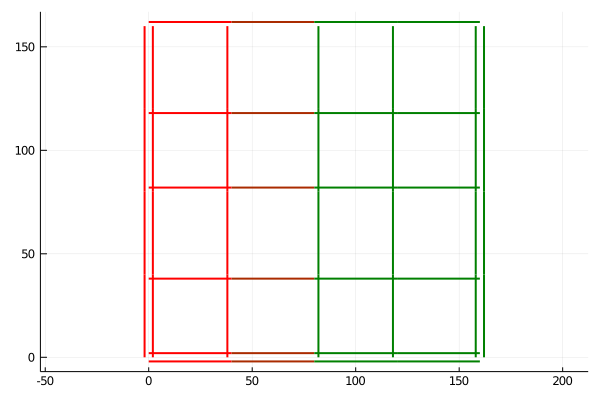

In [81]:
plot_digraph(SquareNet, position_array,attribute_matrix=city_matrix[:,:,4], separated_edges=true)

#### Objeto automovil
- Tiene que tener memoria de los últimos viajes, cuánto tarda en realidad en ir de i a j.
- Tiene que calcular A* al inicio de cada viaje
- Debe tener información sobre su origen y su destino

In [82]:
auto1 = auto(origin_sq,destination_sq,0.25,.25,red_cuadrada);
auto2 = auto(origin_sq,destination_sq,1.00,1.,red_cuadrada);
auto3 = auto(7,19,7.30,.25,red_cuadrada);
auto4 = auto(18,1,8.35,.25,red_cuadrada);
auto5 = auto(20,8,10.5,.25,red_cuadrada);

una vez que el auto ha completado su trayectoria, debe actualizar su camino calculado, pesado por qué tanta importancia le da el automovilista a sus recuerdos.

Conforme el auto va avanzando debe ir guardando los tiempos reales entre los nodos, esto se hará utilizando un diccionario.

### Simulación de los autos
- En cada tiempo se busca cuál es el siguiente evento:
    - Un auto cambia de arista
    - Un auto sale de su origen
    - Un auto llega a su destino
- Se recorrerá el tiempo y cada auto (para el que aplique la condición) avanzará sobre la arista donde va avanzando.
- Cada vez que un auto cambie de arista cambiará la velocidad reportada para el nodo al que llegó
- Una vez que acabe la simulación, los autos actualizan su camino A* usando la heurística de memoria.


In [83]:
autos = [auto1, auto2, auto3, auto4, auto5];

In [85]:
times, vels = simulacion!(0.,red_cuadrada, autos);

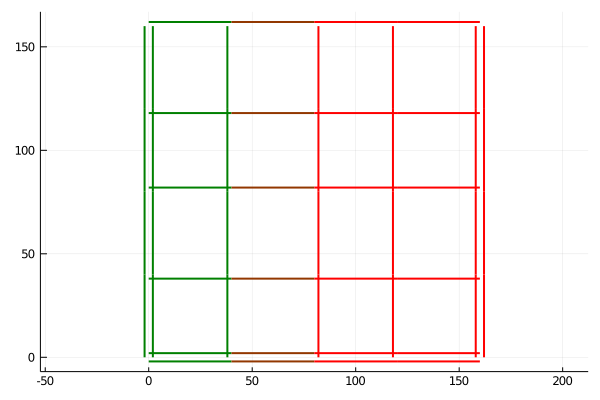

In [86]:
plot_digraph(SquareNet,position_array, attribute_matrix=vels,separated_edges=true)

In [87]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

In [88]:
c1 = colorant"red"
c2 = colorant"blue"
carcolors = range(c1, stop=c2, length=5)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaynodiag-1sent.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaynodiag-1sent.gif")
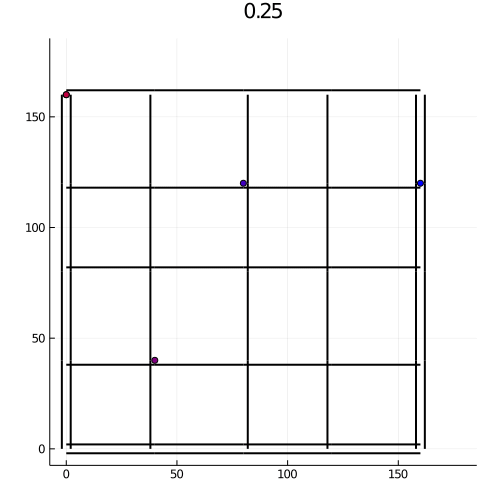

In [90]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors, aspect_ratio =1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false, 
        mcolor = RGB(0,1,0), aspect_ratio =1, size=(500,500))
end
gif(anim, "gifs/firstdaynodiag-1sent.gif", fps = 50)

In [91]:
restart(autos, red_cuadrada)
times, vels = simulacion!(0.,red_cuadrada, autos);

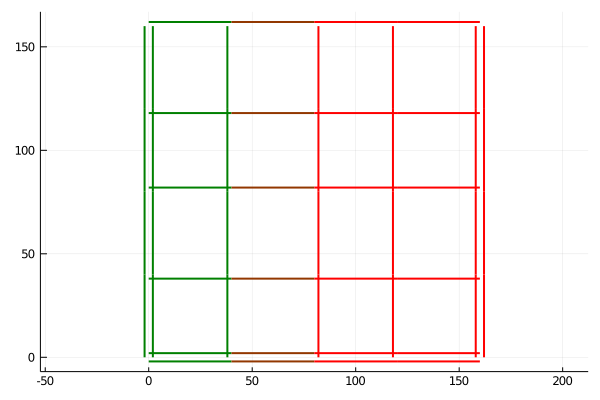

In [92]:
plot_digraph(SquareNet, position_array, attribute_matrix=vels,separated_edges=true)

In [93]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/seconddaynodiag-1sent.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/seconddaynodiag-1sent.gif")
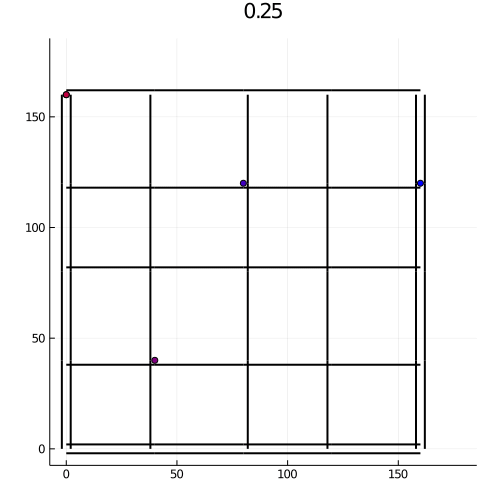

In [94]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet,position_array,separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end
gif(anim, "gifs/seconddaynodiag-1sent.gif", fps = 50)

## Por hacer
- Agregar la condición de que revisen la siguiente calle antes de cambiar de arista.<input type="checkbox" checked>
- Code review hasta ahora.<input type="checkbox" checked>
- Hacer las redes con calles intermedias para simular las esquinas. <input type="checkbox" checked>
- Meter diagonales en la red <input type="checkbox" checked>
- Hacer una animación de algunos autos (10) en una red muy pequeña 4x4 con calles intermedias. Algunas veces para asegurarnos de que todo va bien.<input type="checkbox" checked>
- Hacer los cambios de divide edge <input type="checkbox" checked>
- Corregir la imputaciòn para evitar la extrapolación <input type="checkbox" checked>
- Agregar un tiempo extra al final para que se vea que todos los autos llegan a destino <input type="checkbox" checked>
- Una animación con más autos hasta que empiece a ver cambios de ruta<input type="checkbox" checked>
- Como van cambiando las rutas de animación o la distancia recorrida en función de los días. Todos juntos y con autos particular.<input type="checkbox" checked>

Para las animaciones poner for ijulia o producir las imagenes y hacer la animación afuera o usar @gif o @animate > función gif con número de frames por segundo. Intentar hacer los autitos con dos rectángulos uno debajo del otro.